In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
    
import src.data as dt
import src.feature_engineering as fe

import warnings
warnings.filterwarnings('ignore')

First 5 rows:
                        open     high      low    close
time                                                   
2020-01-02 01:00:00  2165.82  2169.32  2162.89  2163.11
2020-01-02 02:00:00  2163.13  2166.00  2162.70  2164.96
2020-01-02 03:00:00  2164.94  2167.28  2162.74  2165.66
2020-01-02 04:00:00  2165.66  2167.58  2163.86  2167.39
2020-01-02 05:00:00  2167.39  2169.93  2166.75  2169.91 

------------------------------------------------------------------------------------------------------------------------
Last 5 rows:
                        open     high      low    close
time                                                   
2025-09-05 16:00:00  5447.51  5456.26  5433.22  5455.01
2025-09-05 17:00:00  5454.84  5474.80  5451.73  5474.64
2025-09-05 18:00:00  5474.54  5477.82  5459.37  5468.49
2025-09-05 19:00:00  5468.33  5483.78  5466.57  5476.84
2025-09-05 20:00:00  5476.98  5479.45  5474.51  5477.23 

----------------------------------------------------------------

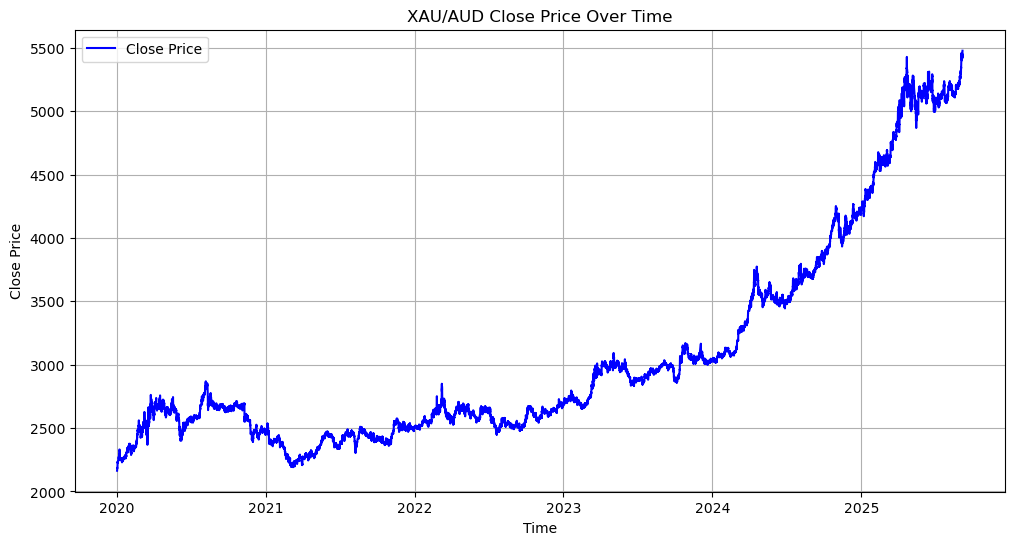

In [2]:
df = dt.first_look(file_path='../data/xauaud.csv', symbole='XAU/AUD')

In [3]:
ohlc_pct_change_df = dt.pct_change(df)
ohlc_pct_change_df.to_csv('../data/ohlc_pct_change.csv')

First 3 rows:
                     open_pct_change  high_pct_change  low_pct_change  \
time                                                                    
2020-01-02 02:00:00        -0.001242        -0.001530       -0.000088   
2020-01-02 03:00:00         0.000837         0.000591        0.000018   
2020-01-02 04:00:00         0.000333         0.000138        0.000518   

                     close_pct_change  
time                                   
2020-01-02 02:00:00          0.000855  
2020-01-02 03:00:00          0.000323  
2020-01-02 04:00:00          0.000799   

------------------------------------------------------------------------------------------------------------------------
Last 3 rows:
                     open_pct_change  high_pct_change  low_pct_change  \
time                                                                    
2025-09-05 18:00:00         0.003611         0.000552        0.001401   
2025-09-05 19:00:00        -0.001134         0.001088        0.00

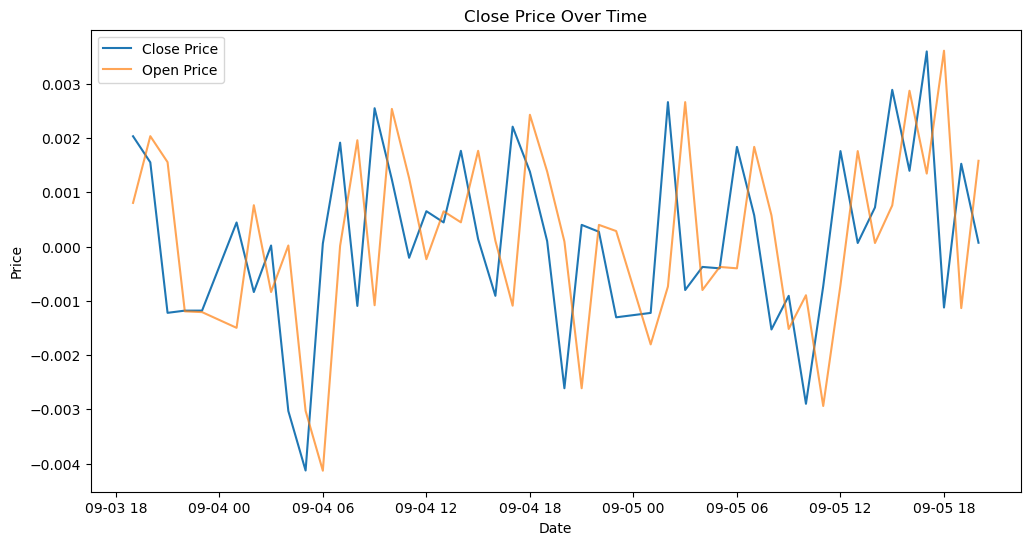

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(df['close_pct_change'].tail(48), label='Close Price')
plt.plot(df['open_pct_change'].tail(48), label='Open Price', alpha=0.7)    
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [5]:
df_with_features, num_lags = fe.lags_and_rolls(df, num_lags=20, num_rolls=5)

First 3 rows:
                        open     high      low    close  open_pct_change  \
time                                                                       
2020-01-02 21:00:00  2185.93  2187.50  2184.81  2186.64         0.000897   
2020-01-02 22:00:00  2186.70  2187.92  2185.26  2187.42         0.000352   
2020-01-02 23:00:00  2187.42  2187.94  2186.73  2187.46         0.000329   

                     high_pct_change  low_pct_change  close_pct_change  \
time                                                                     
2020-01-02 21:00:00         0.000549        0.000435          0.000325   
2020-01-02 22:00:00         0.000192        0.000206          0.000357   
2020-01-02 23:00:00         0.000009        0.000673          0.000018   

                     close_lag_1  close_lag_2  ...  close_roll_std2  \
time                                           ...                    
2020-01-02 21:00:00      2185.93      2183.97  ...         0.502046   
2020-01-02 22:00:00  

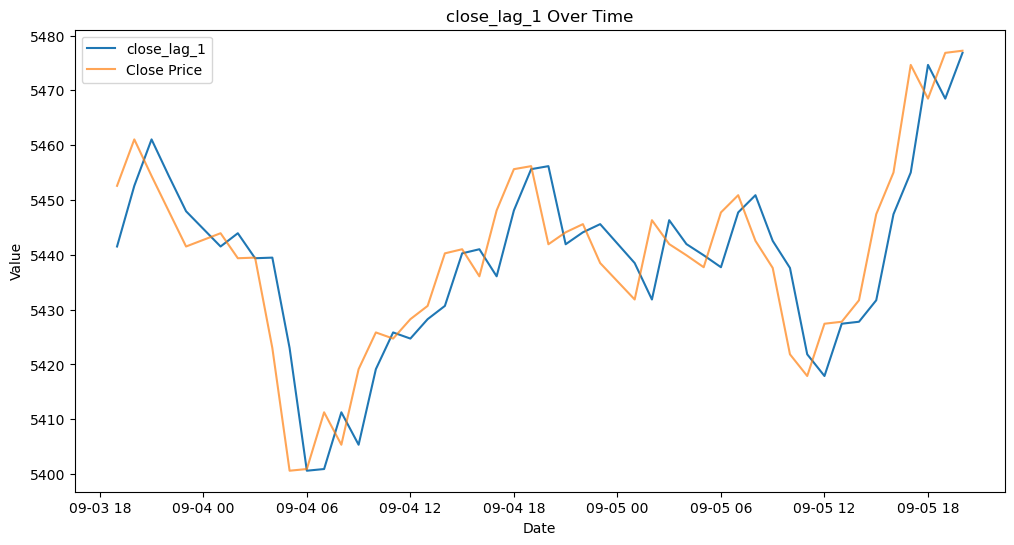

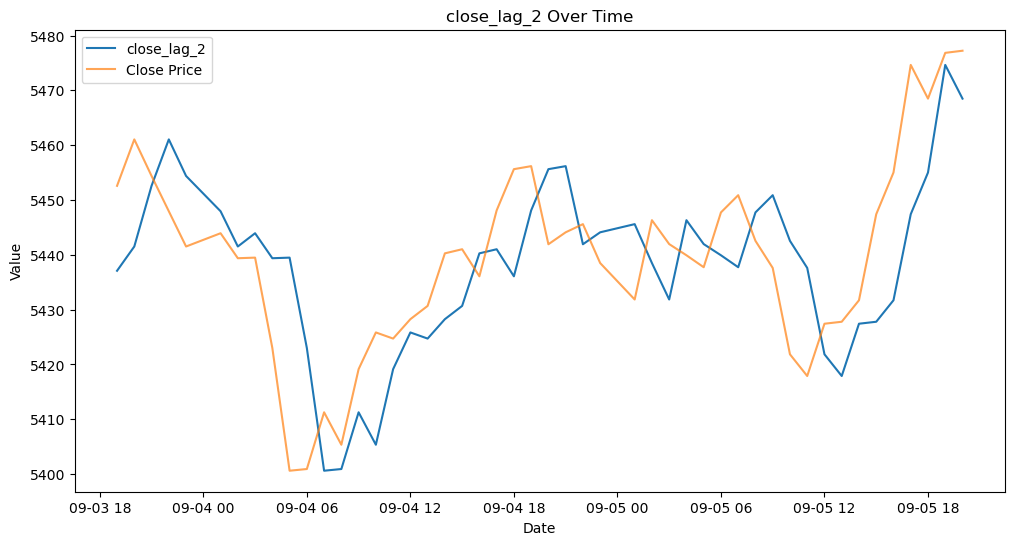

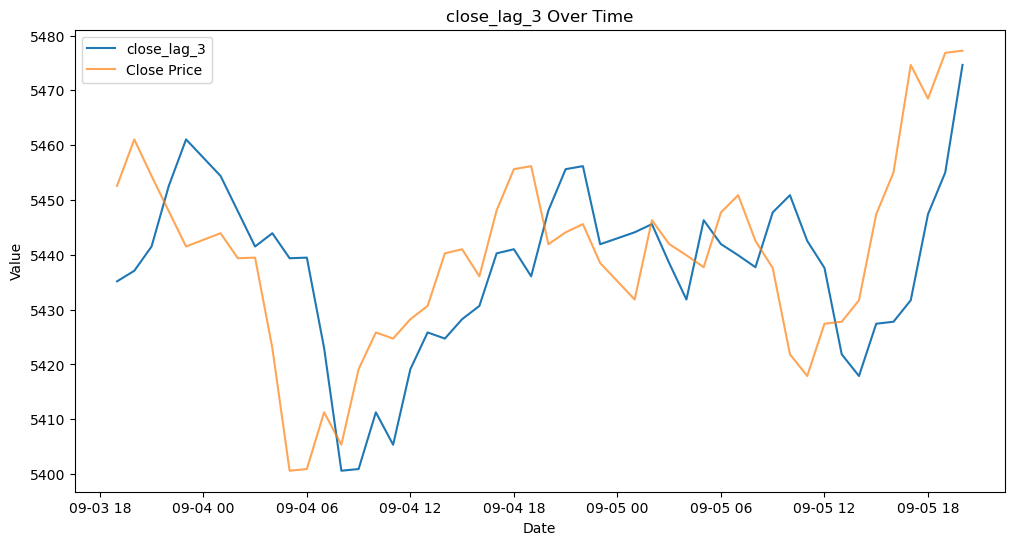

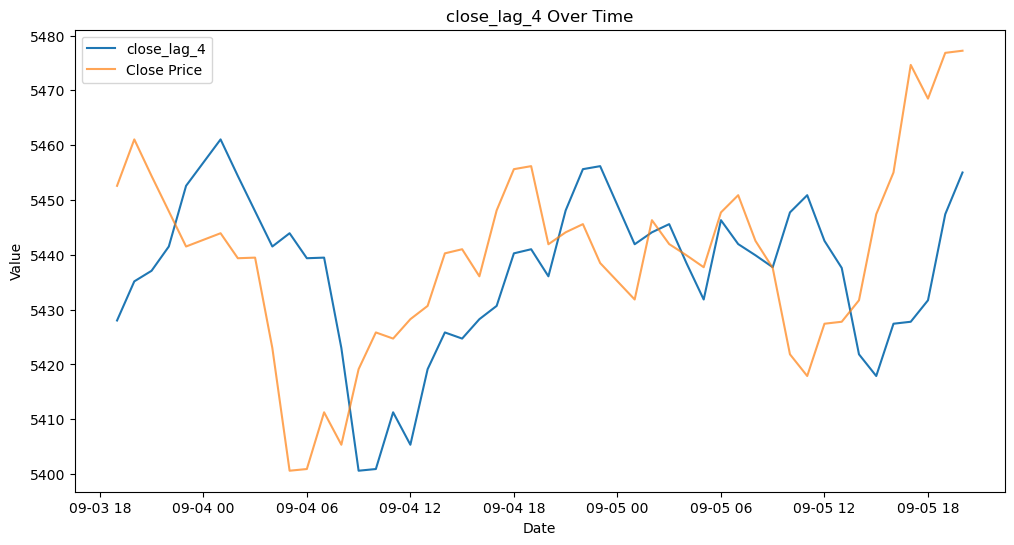

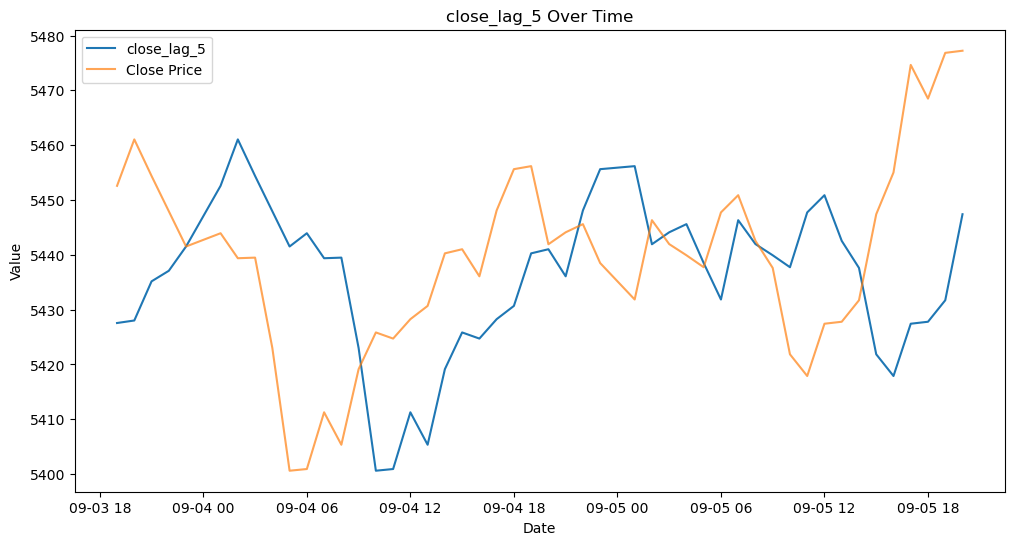

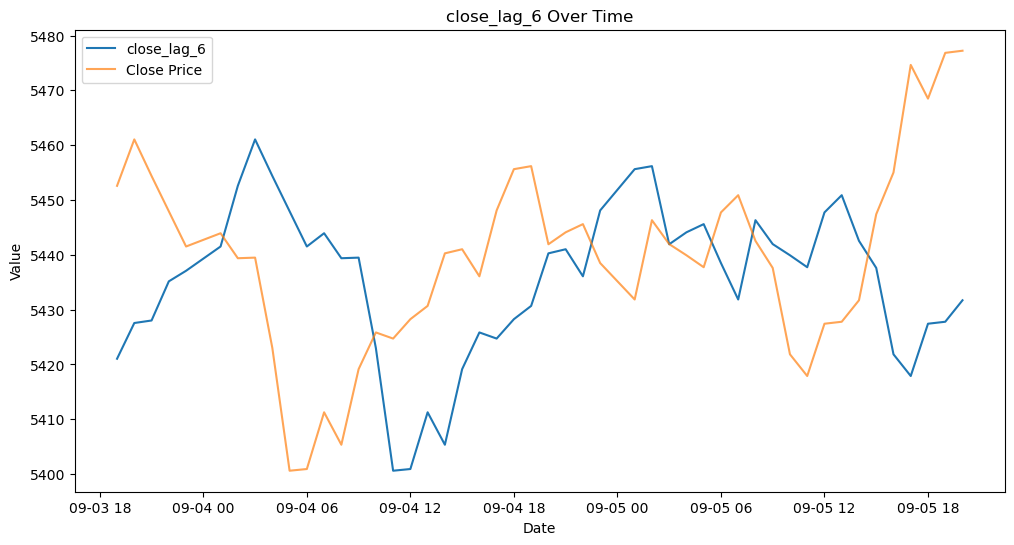

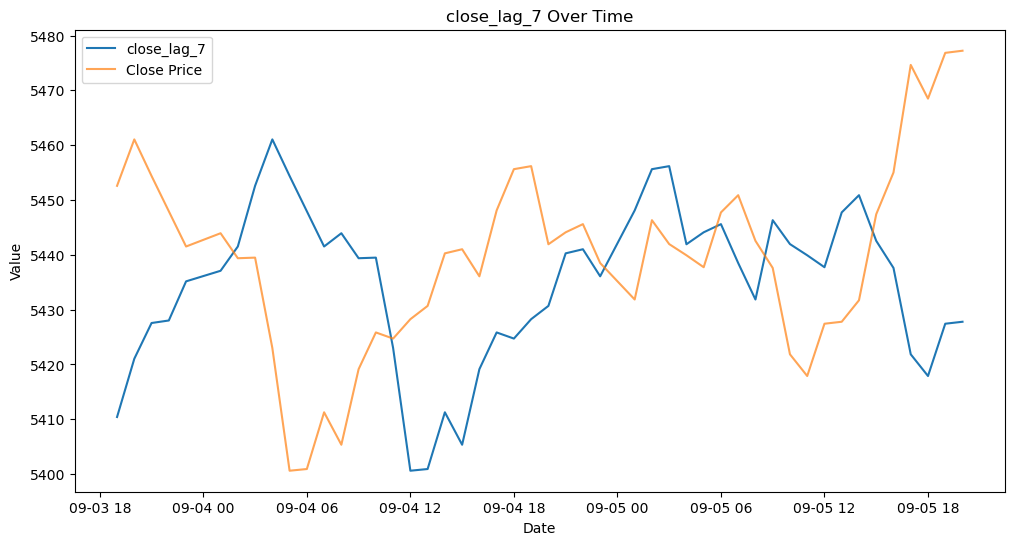

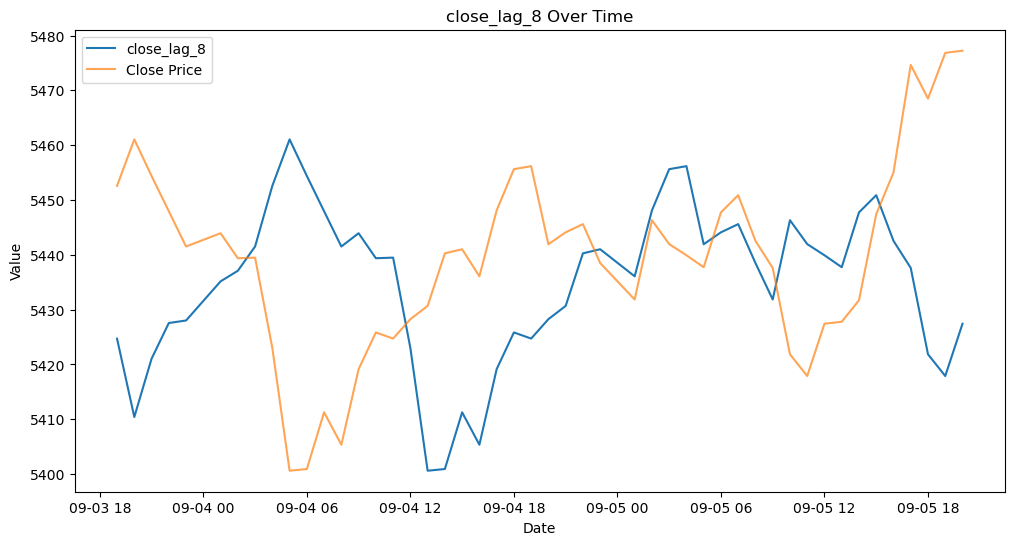

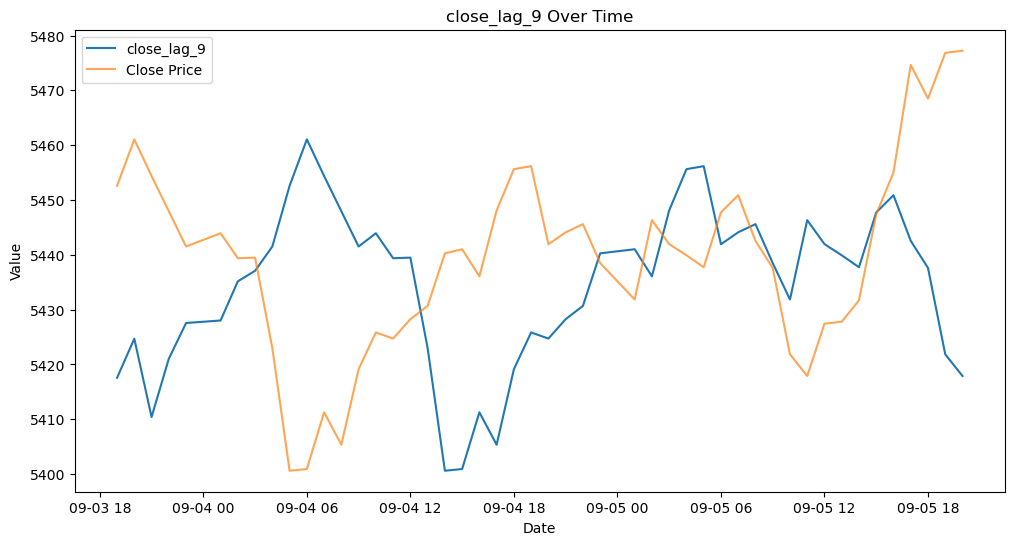

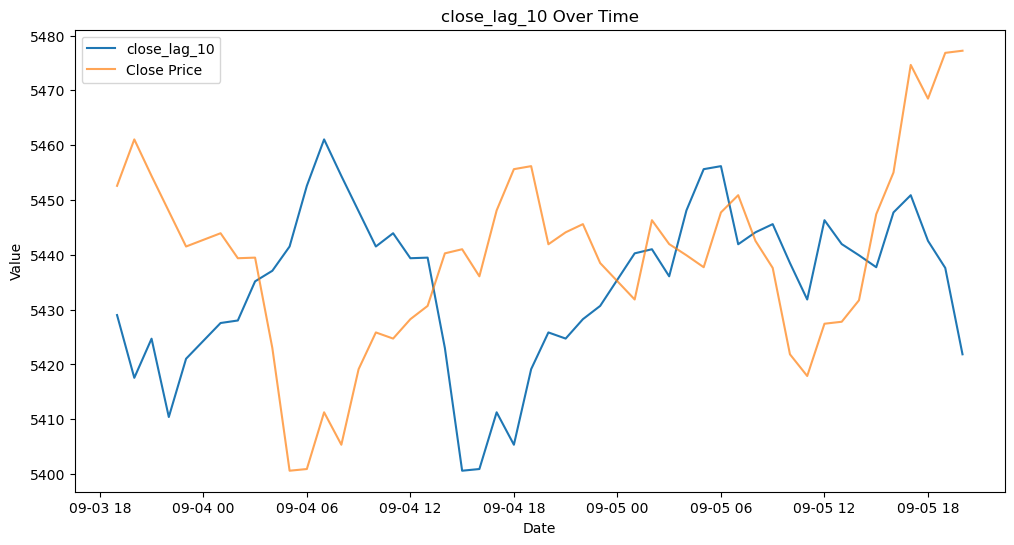

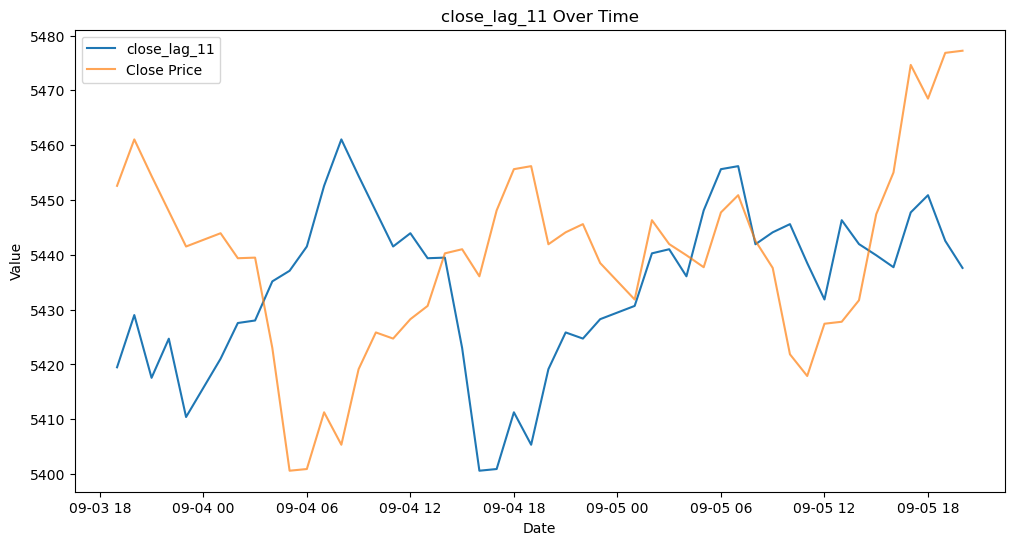

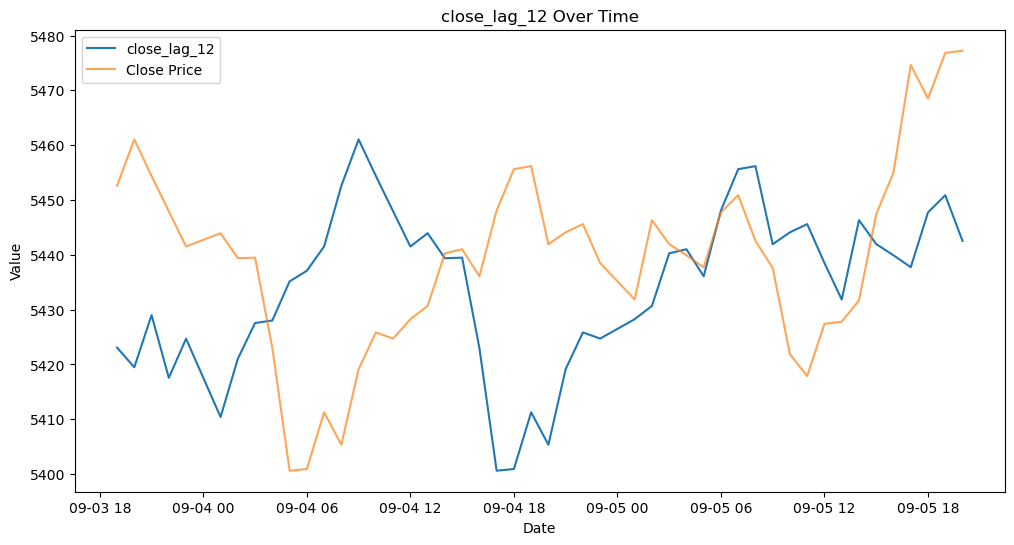

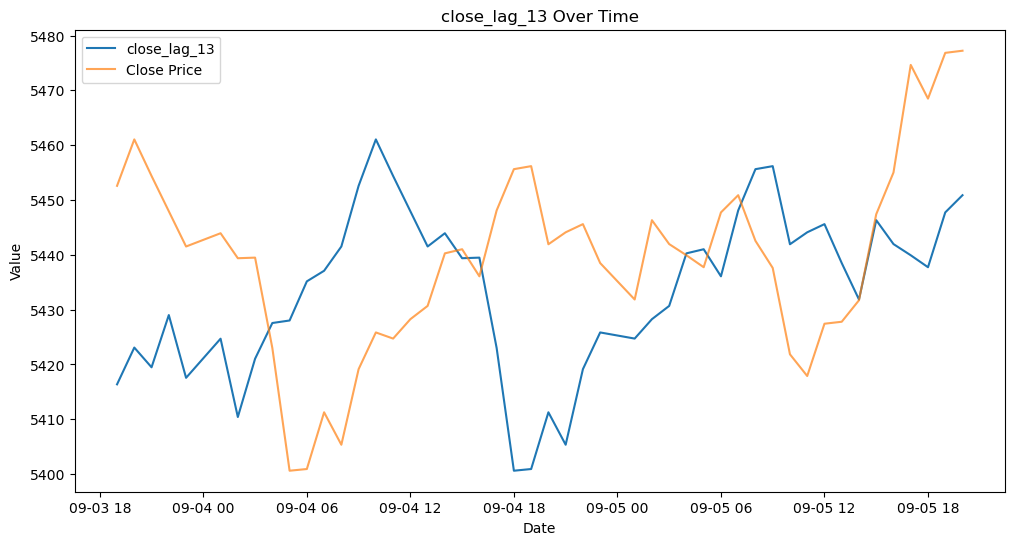

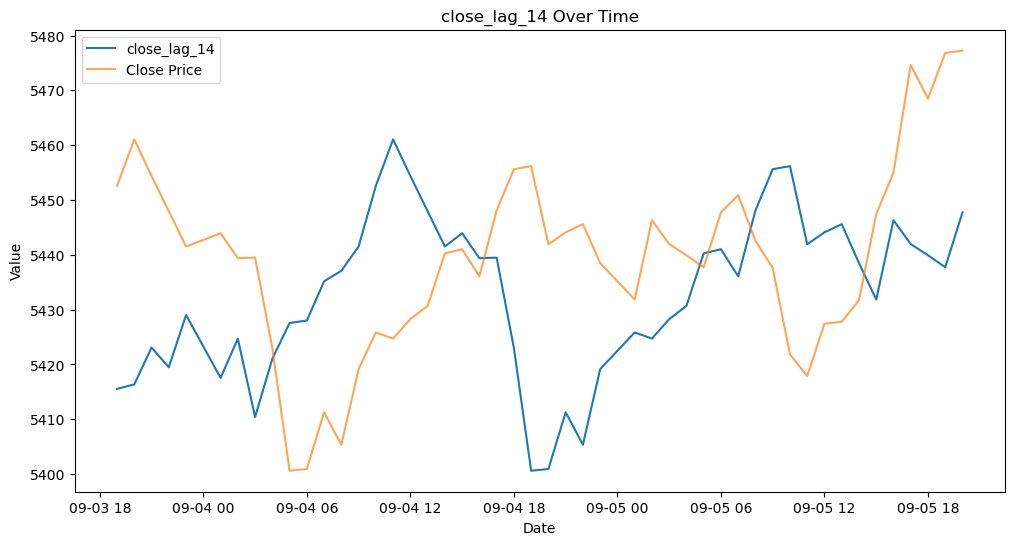

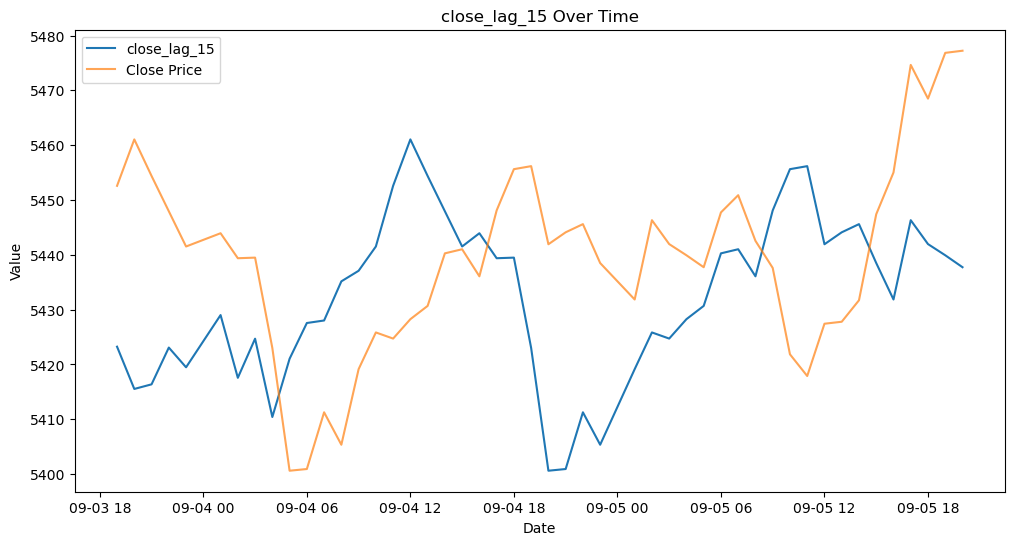

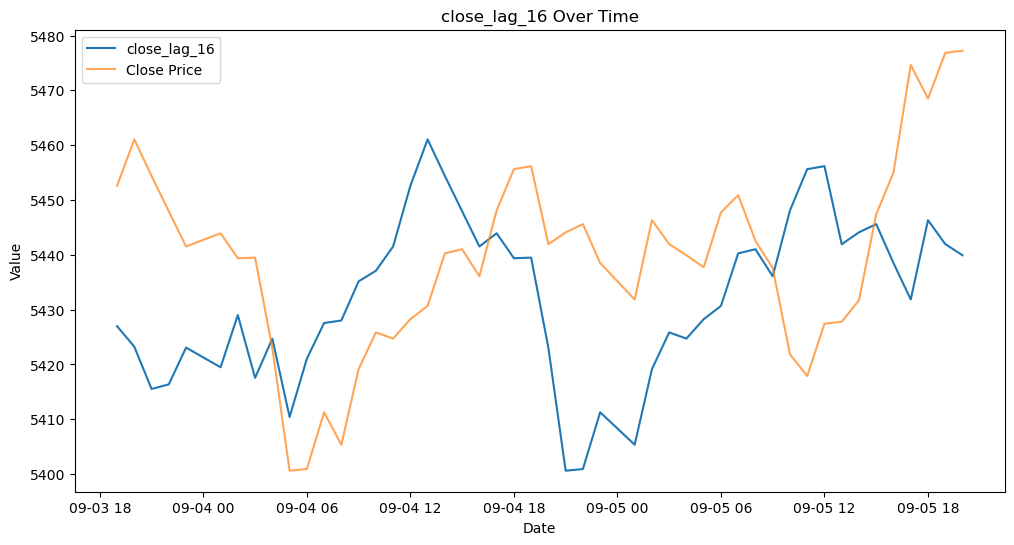

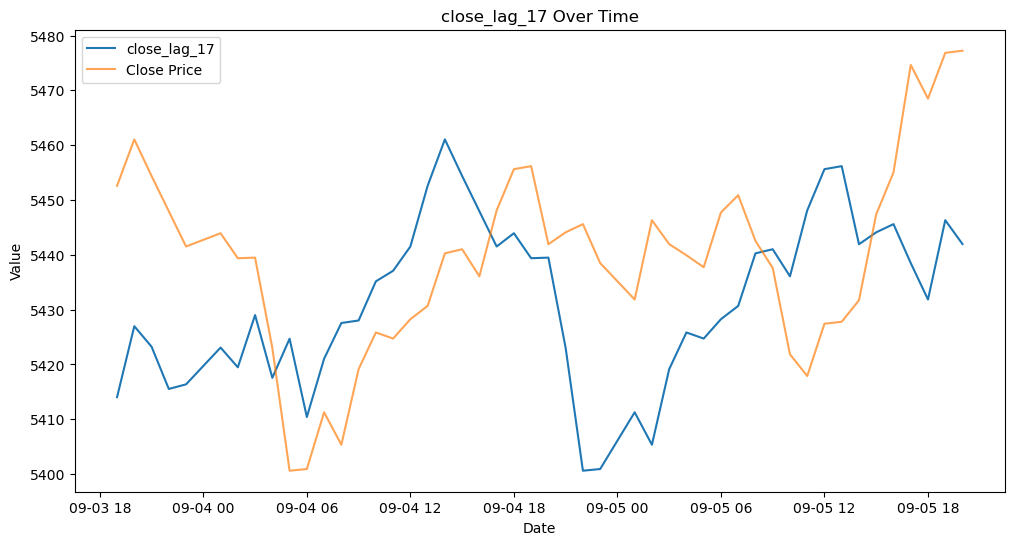

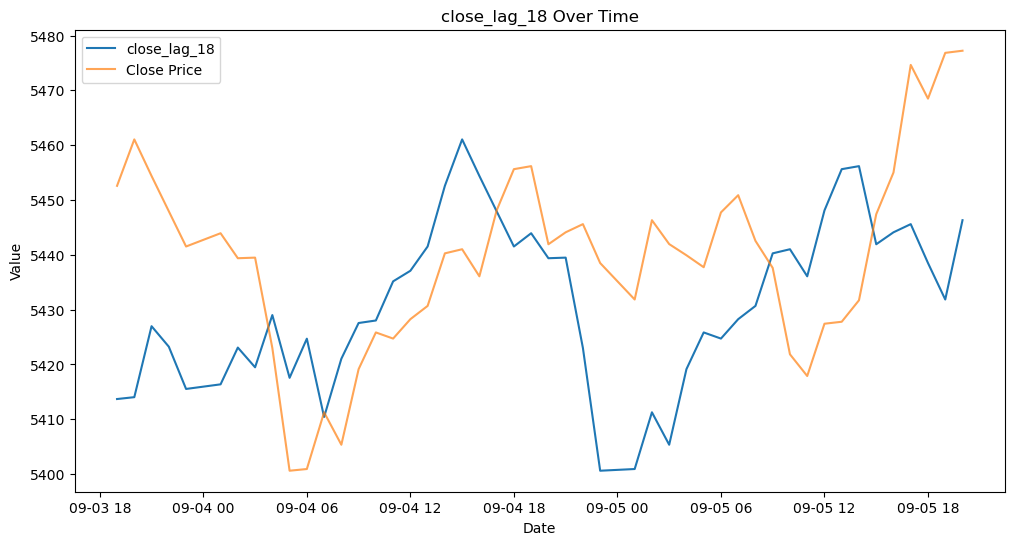

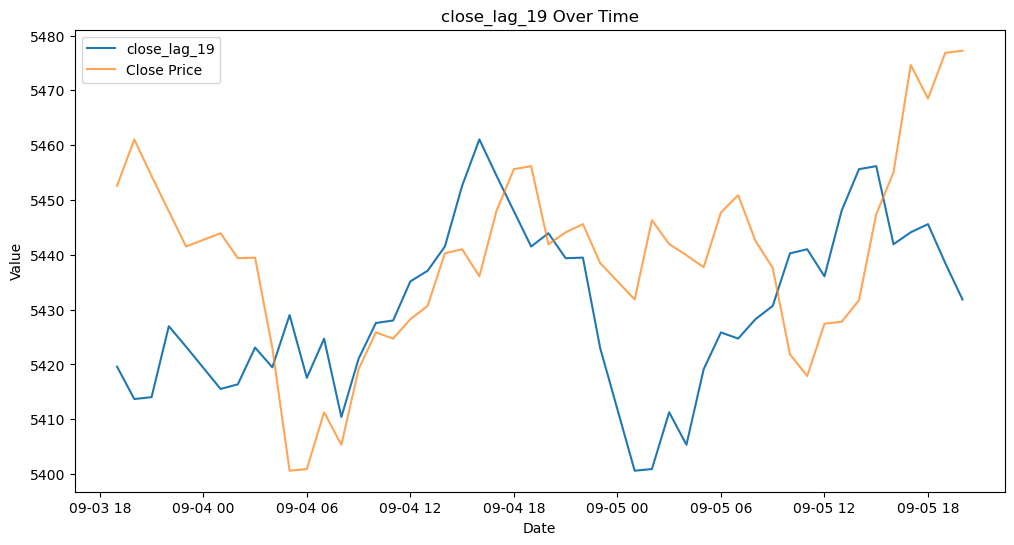

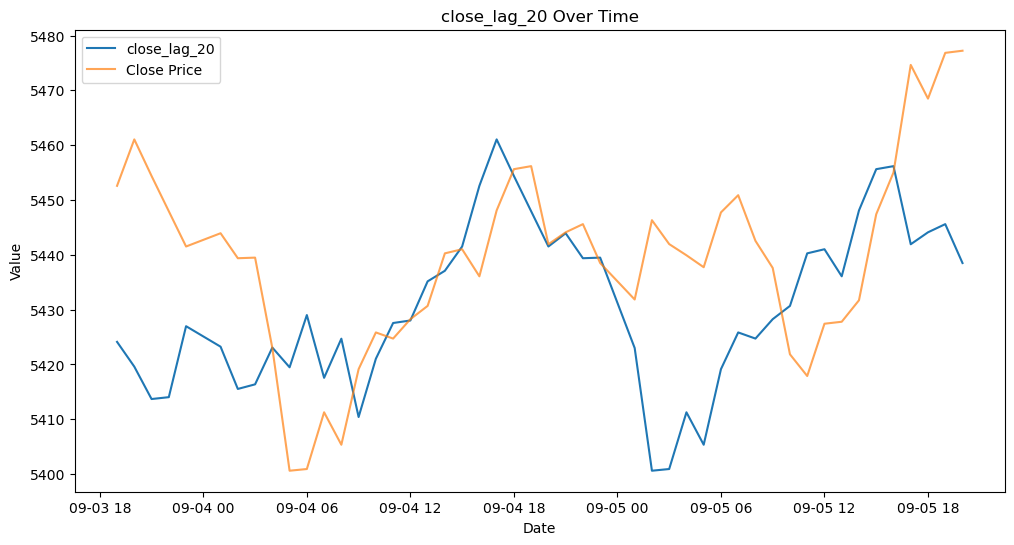

In [8]:
lst =[]
for i in range(1, num_lags):
    lst.append (f'close_lag_{i}')

for col in lst:
    plt.figure(figsize=(12, 6))
    plt.plot(df_with_features[col].tail(48), label=col)    
    plt.plot(df['close'].tail(48), label='Close Price', alpha=0.7)
    plt.title(f'{col} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    
# #heatmap of correlations
# plt.figure(figsize=(14, 10))    
# sns.heatmap(df_with_features[lst + ['close']].corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
# plt.title('Feature Correlation Heatmap', fontsize=16)
# plt.show()